This code generates and visualizes the Probability Density Function (PDF) and Cumulative Distribution Function (CDF) of a normal distribution. 

1. The PDF of a normal distribution is given by:
   $$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

   
2. The CDF is the integral of the PDF and is represented as:
   $$ F(x) = \int_{-\infty}^{x} f(t) dt $$

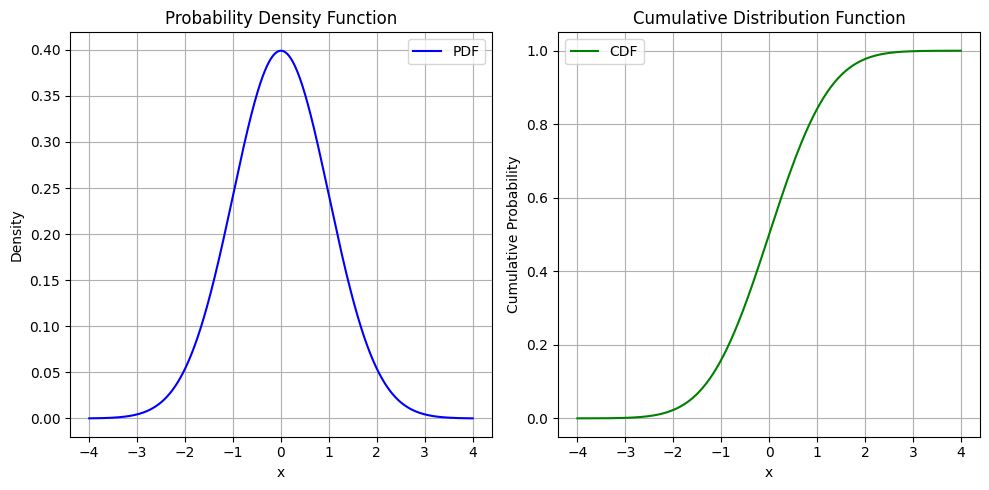

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution

# Generate x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate PDF and CDF
pdf = norm.pdf(x, mean, std_dev)
cdf = norm.cdf(x, mean, std_dev)

# Plot PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label="PDF", color="blue")
plt.title("Probability Density Function")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid()
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="CDF", color="green")
plt.title("Cumulative Distribution Function")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

Brownian motion is represented by the following equation:

$$ X(t + \Delta t) = X(t) + \mu \Delta t + \sigma \sqrt{\Delta t} \cdot Z $$

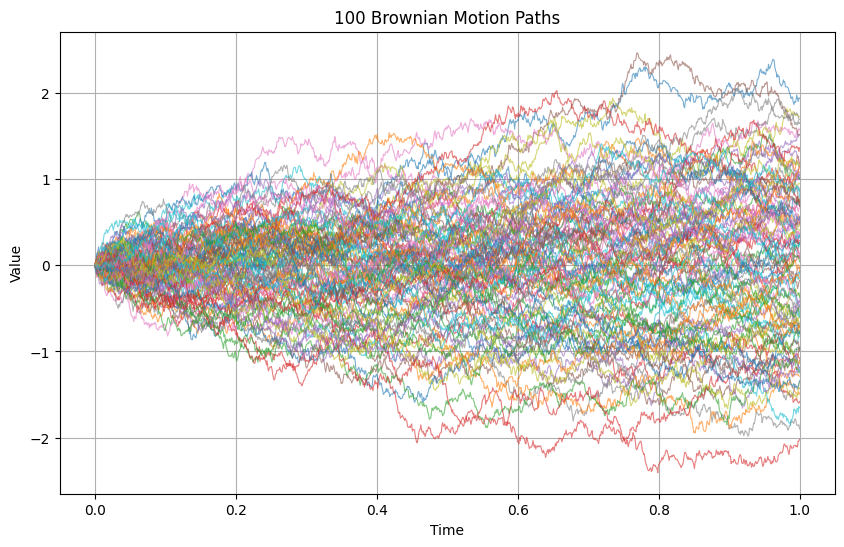

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion
n_paths = 100  # Number of paths
n_steps = 1000  # Number of time steps
T = 1  # Total time (in years)
dt = T / n_steps  # Time step size
mu = 0  # Drift (mean)
sigma = 1  # Volatility (standard deviation)

# Generate Brownian motion paths
np.random.seed(42)  # For reproducibility
time = np.linspace(0, T, n_steps)
brownian_paths = np.zeros((n_steps, n_paths))

for i in range(1, n_steps):
    brownian_paths[i] = brownian_paths[i - 1] + np.random.normal(mu * dt, sigma * np.sqrt(dt), n_paths)

# Plot the Brownian motion paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time, brownian_paths[:, i], lw=0.8, alpha=0.6)
plt.title("100 Brownian Motion Paths")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

Below are the three approaches for fetching the same path for a stock:

First approach:

$$ X(t + \Delta t) = X(t) + (\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma \sqrt{\Delta t} \cdot Z $$
$$ S(t) = S_0e^{X(t)}

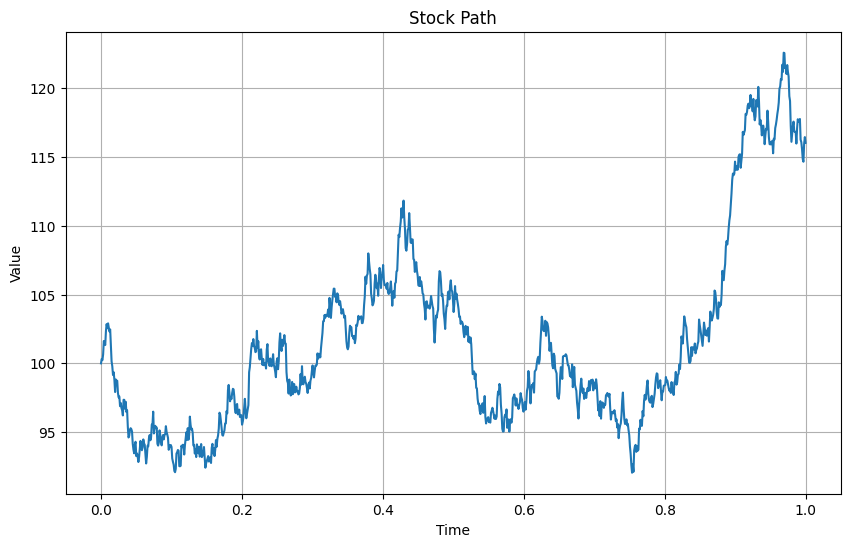

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion
n_paths = 1  # Number of paths
n_steps = 1000  # Number of time steps
T = 1  # Total time (in years)
dt = T / n_steps  # Time step size
mu = 0.05  # Drift (mean)
sigma = 0.2  # Volatility (standard deviation)
S0 = 100  # Initial stock price

# Generate Brownian motion paths
np.random.seed(42)  # For reproducibility
time = np.linspace(0, T, n_steps)
brownian_paths = np.zeros((n_steps, n_paths))


for i in range(1, n_steps):

    # 2 formulas for obtaining the same result

    #brownian_paths[i] = brownian_paths[i - 1] + np.random.normal((mu - 0.5 * sigma **2 ) * dt, sigma * np.sqrt(dt), n_paths)

    Z = np.random.normal(0.0,1.0)
    brownian_paths[i] = brownian_paths[i - 1] + (mu - 0.5 * sigma **2 ) * dt + sigma * np.sqrt(dt)*Z
    

S = S0 * np.exp(brownian_paths)
# Plot the Brownian motion paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time, S[:,i])
plt.title("Stock Path")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

Second approach:

$$ S(t + \Delta t) = S(t) + \mu S(t) \Delta t + \sigma S(t) \sqrt{\Delta t} \cdot Z $$

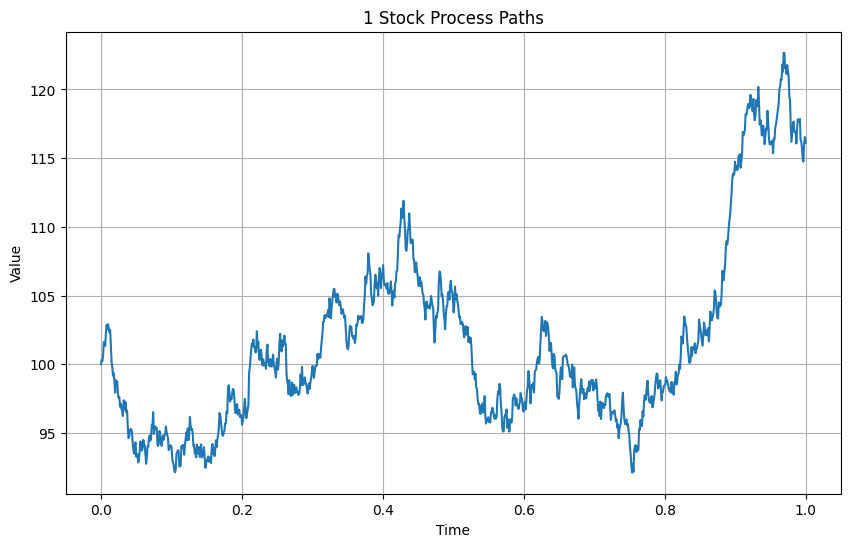

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion
n_paths = 1  # Number of paths
n_steps = 1000  # Number of time steps
T = 1  # Total time (in years)
dt = T / n_steps  # Time step size
mu = 0.05  # Drift (mean)
sigma = 0.2  # Volatility (standard deviation)
S0  = 100  # Initial stock price 

# Generate Brownian motion paths
np.random.seed(42)  # For reproducibility
time = np.linspace(0, T, n_steps)
stock_paths = np.zeros((n_steps, n_paths))
stock_paths[0] = S0  # Set initial stock price

for i in range(1, n_steps):
    
    # 2 formulas for obtaining the same result

    #stock_paths[i] = stock_paths[i - 1] + stock_paths[i - 1] * ( np.random.normal(mu * dt, sigma * np.sqrt(dt), n_paths) )

    Z = np.random.normal(0, 1)  # Standard normal random variable
    stock_paths[i] = stock_paths[i - 1] + stock_paths[i - 1] * ( mu * dt + sigma * np.sqrt(dt) * Z ) 

# Plot the Brownian motion paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time, stock_paths[:, i])
plt.title(str(n_paths) + " Stock Process Paths")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

Third approach:

The dS(t) GBM equation solution is given as:

$$ S(t + \Delta t) = S(t) \cdot e^{\left( \mu - \frac{\sigma^2}{2} \right) \Delta t + \sigma \sqrt{\Delta t} \cdot Z} $$

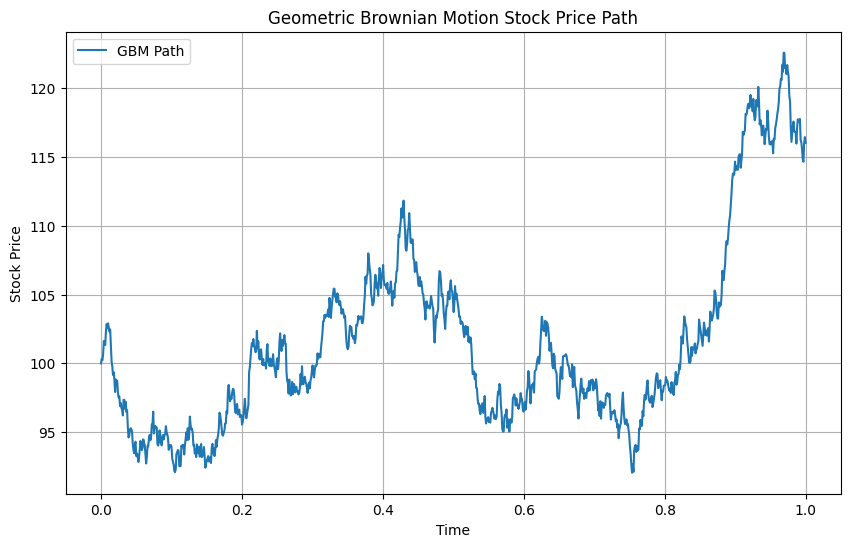

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
S0 = 100  # Initial stock price
mu = 0.05  # Drift (annualized return)
sigma = 0.2  # Volatility (standard deviation)
T = 1  # Time horizon (in years)
n_steps = 1000  # Number of time steps
dt = T / n_steps  # Time step size

# Generate GBM path
np.random.seed(42)  # For reproducibility
time = np.linspace(0, T, n_steps)
stock_price = np.zeros(n_steps)
stock_price[0] = S0

for i in range(1, n_steps):
    Z = np.random.normal(0, 1)  # Standard normal random variable
    stock_price[i] = stock_price[i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plot the GBM path
plt.figure(figsize=(10, 6))
plt.plot(time, stock_price, label="GBM Path")
plt.title("Geometric Brownian Motion Stock Price Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.grid()
plt.legend()
plt.show()

Modelling the returns:

$$ S(t + \Delta t) = S(t) + \mu S(t) \Delta t + \sigma S(t) \sqrt{\Delta t} \cdot Z $$

Remember, 

$$ E[S(t)] = e^{\mu T} $$

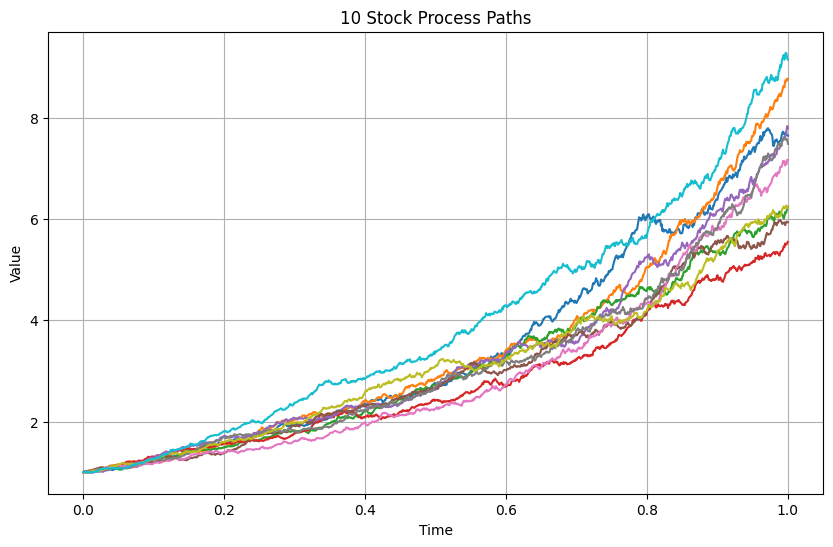

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion
n_paths = 10  # Number of paths
n_steps = 1000  # Number of time steps
T = 1  # Total time (in years)
dt = T / n_steps  # Time step size
mu = 2  # Drift (mean)
sigma = 0.2  # Volatility (standard deviation)
S0  = 1  # Initial stock price 

# Generate Brownian motion paths
np.random.seed(42)  # For reproducibility
time = np.linspace(0, T, n_steps)
stock_paths = np.zeros((n_steps, n_paths))
stock_paths[0] = S0  # Set initial stock price

for i in range(1, n_steps):
    stock_paths[i] = stock_paths[i - 1] + stock_paths[i - 1] * ( np.random.normal(mu * dt, sigma * np.sqrt(dt), n_paths) )

# Plot the Brownian motion paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time, stock_paths[:, i])
plt.title(str(n_paths) + " Stock Process Paths")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

The expectations of the Arithmetic Brownian Motion (ABM), Geometric Brownian Motion (GBM), and Ornstein-Uhlenbeck (OU) processes differ based on their mathematical properties:

1. **Arithmetic Brownian Motion (ABM):**
   - ABM follows the process: 
     $$ S(t) = S(0) + \mu t + \sigma W(t), $$
     where \(W(t)\) is standard Brownian motion.
   - The expectation is:
     $$ \mathbb{E}[S(t)] = S(0) + \mu t. $$
   

2. **Geometric Brownian Motion (GBM):**
   - GBM follows the process:
     $$ S(t) = S(0) \cdot \exp\left( \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W(t) \right). $$
   - The expectation is:
     $$ \mathbb{E}[S(t)] = S(0) \cdot e^{\mu t}. $$
   

3. **Ornstein-Uhlenbeck (OU) Process:**
   - OU follows the process:
     $$ x(t) = x(0) + \kappa(\theta - x(t))\Delta t + \sigma W(t), $$
     where \(\kappa\) is the speed of mean reversion, \(\theta\) is the long-term mean, and \(x(0)\) is the initial value.
   - The expectation is:
     $$ \mathbb{E}[x(t)] = \theta + (x(0) - \theta)e^{-\kappa t}. $$
   

### Key Insights:
- **ABM**: Linear growth with drift.
- **GBM**: Exponential growth, making it suitable for modeling stock prices.
- **OU**: Mean-reverting process, often used in interest rates or physical systems.

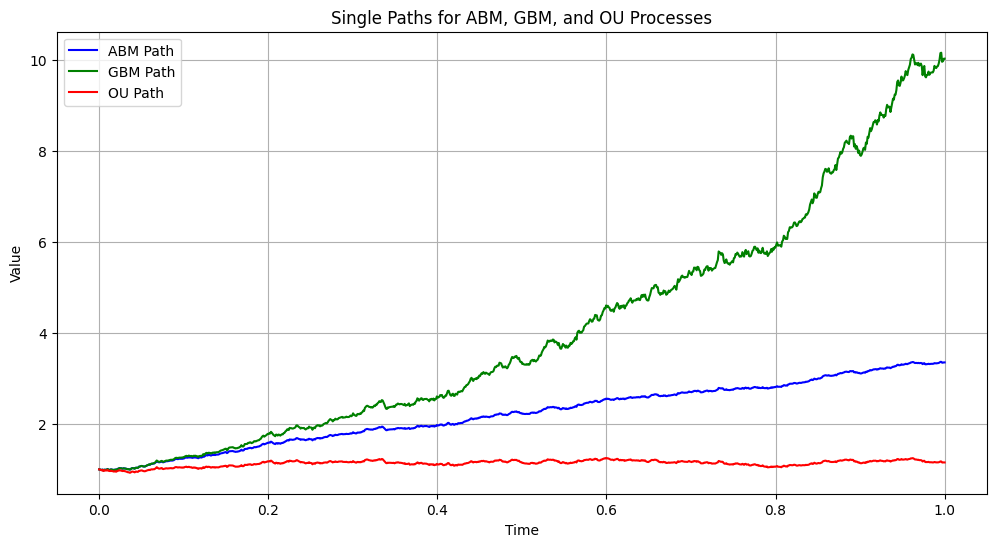

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1  # Time horizon (in years)
n_steps = 1000  # Number of time steps
dt = T / n_steps  # Time step size
mu = 2  # Drift
sigma = 0.3  # Volatility
S0 = 1  # Initial stock price (for ABM and GBM and OU)
theta = 1  # Mean reversion level (for OU)
kappa = 1.5  # Speed of mean reversion (for OU)


# Generate Brownian motion
np.random.seed(1)  # For reproducibility
Z = np.random.normal(0, 1, n_steps)
dW = Z * np.sqrt(dt)
time = np.linspace(0, T, n_steps)

# Paths
abm_path = np.zeros(n_steps)
gbm_path = np.zeros(n_steps)
ou_path = np.zeros(n_steps)

abm_path[0] = S0
gbm_path[0] = S0
ou_path[0] = S0

for i in range(1, n_steps):
    abm_path[i] = abm_path[i - 1] + mu * dt + sigma * dW[i]
    gbm_path[i] = gbm_path[i - 1] + gbm_path[i - 1] * ( mu * dt + sigma * dW[i] ) 
    ou_path[i] = ou_path[i - 1] + kappa * (theta - ou_path[i - 1]) * dt + sigma * dW[i]

# Plot Paths
plt.figure(figsize=(12, 6))
plt.plot(time, abm_path, label="ABM Path", color="blue")
plt.plot(time, gbm_path, label="GBM Path", color="green")
plt.plot(time, ou_path, label="OU Path", color="red")
plt.title("Single Paths for ABM, GBM, and OU Processes")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


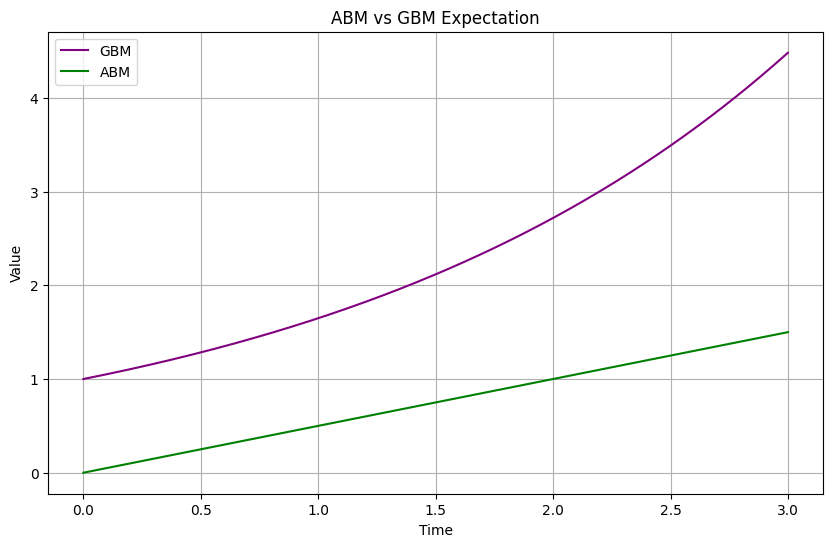

In [13]:
### Change the T variable to 1, 3, and 10 and see the changes in the graph.
# Plot exp function between 0 and 5

mu = 0.5
T = 3
n_steps = 1000
time = np.linspace(0, T, n_steps)
GBM_expectation = np.exp(mu * time)
ABM_expectation = mu * time
plt.figure(figsize=(10, 6))
plt.plot(time, GBM_expectation, label="GBM", color="purple")
plt.plot(time, ABM_expectation, label="ABM", color="green")
plt.title("ABM vs GBM Expectation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

In [ ]:
np